# Naive Bayes Classifier in Machine Learning

Naive Bayes is a probabilistic classifier based on Bayes' theorem, assuming that all features are independent given the class label. Despite its simplicity, Naive Bayes can be surprisingly effective for tasks like text classification, spam detection, and sentiment analysis.

## Key Concepts of Naive Bayes

1. Bayes’ Theorem: This theorem provides a way to calculate the probability of a class given some evidence (or features) by combining prior knowledge with new evidence.
   
   \[
   P(\text{Class} | \text{Features}) = \frac{P(\text{Features} | \text{Class}) \cdot P(\text{Class})}{P(\text{Features})}
   \]
   
   - \( P(\text{Class} | \text{Features}) \): **Posterior Probability** – the probability of the class given the features.
   - \( P(\text{Features} | \text{Class}) \): **Likelihood** – the probability of the features given the class.
   - \( P(\text{Class}) \): **Prior Probability** – the prior probability of the class.
   - \( P(\text{Features}) \): **Marginal Probability** – the marginal probability of the features.

2. Naive Assumption: The model assumes that each feature contributes independently to the probability of the class. This means:

   \[
   P(\text{Features} | \text{Class}) = P(\text{Feature}_1 | \text{Class}) \cdot P(\text{Feature}_2 | \text{Class}) \cdot \dots \cdot P(\text{Feature}_n | \text{Class})
   \]

## Visualization of Naive Bayes

Let's consider an example of classifying emails as "Spam" or "Not Spam" based on features like the presence of certain keywords.

1. Data Representation: Imagine a scatterplot where each point represents an email, with "Spam" and "Not Spam" as two classes in different colors. The features could be represented along the axes, such as "Frequency of 'Free'" on the x-axis and "Frequency of 'Offer'" on the y-axis.

2. Conditional Probability Distribution:
   - For each class ("Spam" and "Not Spam"), Naive Bayes assumes the distributions of the features are independent and can be represented with a probability density. In the visualization, you might see bell curves (for Gaussian Naive Bayes) showing the likelihood of each feature for "Spam" and "Not Spam."
   
3. Decision Boundary:
   - Naive Bayes classifies new data by calculating the probability of each class for given features and assigning it to the class with the highest probability. On the scatterplot, the **decision boundary** (a line or curve) divides the "Spam" and "Not Spam" regions based on these calculated probabilities.

### Step-by-Step Illustration of Naive Bayes Classification Process

1. For each new email, calculate the likelihood of the email being "Spam" and "Not Spam" based on the frequencies of keywords.
2. Multiply the likelihoods with prior probabilities.
3. Classify the email into the class with the higher posterior probability.

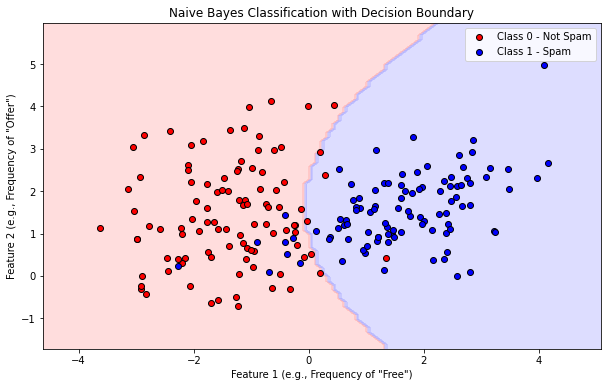

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from matplotlib.colors import ListedColormap

# Generate synthetic data
X, y = make_classification(
    n_samples=200, n_features=2, n_informative=2, n_redundant=0,
    n_clusters_per_class=1, class_sep=1.5, random_state=42
)

# Instantiate and train Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X, y)

# Set up the mesh grid for visualization
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict class probabilities for each point in the mesh
Z = nb_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Set up the plot
plt.figure(figsize=(10, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ['#FF0000', '#0000FF']

# Plot decision boundaries
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.4)

# Plot the training points
for idx, color in enumerate(cmap_bold):
    plt.scatter(X[y == idx, 0], X[y == idx, 1], c=color, label=f"Class {idx} - {'Spam' if idx else 'Not Spam'}", edgecolor='k')

# Add labels and legend
plt.xlabel('Feature 1 (e.g., Frequency of "Free")')
plt.ylabel('Feature 2 (e.g., Frequency of "Offer")')
plt.legend()
plt.title('Naive Bayes Classification with Decision Boundary')
plt.show()
